This tutorial shows how to use the public point-source data for a time dependent point-source analysis. The time fit is performed by the expectation maximization (EM) algorithm.   

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from skyllh.analyses.i3.publicdata_ps.time_dependent_ps import (
    create_analysis,
    do_trials_with_em,
    unblind_single_flare,
    TXS_0506_PLUS056_ALERT_TIME,
    TXS_0506_PLUS056_SOURCE,
)
from skyllh.core.random import RandomStateService
from skyllh.datasets.i3.PublicData_10y_ps import create_dataset_collection
from skyllh.physics.source_model import PointLikeSource

In [2]:
dsc = create_dataset_collection(
    base_path="/home/mwolf/projects/publicdata_ps/")
datasets = dsc.get_datasets(["IC86_II-VII"])

We create the ``Anaylsis`` instance for the TXS 0506+056 source.

In [3]:
ana = create_analysis(
    datasets=datasets, 
    source=TXS_0506_PLUS056_SOURCE, 
    refplflux_gamma=2.0, 
    gauss={"mu":57000, "sigma": 65})

100%|██████████| 44/44 [00:00<00:00, 6738.58it/s]


In [4]:
em_results = unblind_single_flare(
    ana=ana, 
    remove_time=TXS_0506_PLUS056_ALERT_TIME)

100%|██████████| 51/51 [00:06<00:00,  8.03it/s]


In [5]:
print(em_results)

[(1.  , 56973.23708581,  31.3563052 , 1.79515876e+00)
 (1.08, 56973.54484189,  31.14357769, 1.90863994e+00)
 (1.16, 56973.83307677,  30.87665456, 2.03884445e+00)
 (1.24, 56974.08415341,  30.55533666, 2.18552345e+00)
 (1.32, 56974.28746397,  30.18832367, 2.34723234e+00)
 (1.4 , 56974.43460415,  29.79011038, 2.52276533e+00)
 (1.48, 56974.52115046,  29.38462682, 2.70882968e+00)
 (1.56, 56974.54623867,  28.99947969, 2.90061350e+00)
 (1.64, 56974.51341733,  28.66214757, 3.09018079e+00)
 (1.72, 56974.43221152,  28.37640449, 3.27745255e+00)
 (1.8 , 56974.30631703,  28.15416286, 3.45507477e+00)
 (1.88, 56974.14586177,  27.99657819, 3.61748184e+00)
 (1.96, 56973.9490699 ,  27.88953708, 3.76387819e+00)
 (2.04, 56973.72989754,  27.82971047, 3.88935168e+00)
 (2.12, 56973.48898241,  27.81453748, 3.98970729e+00)
 (2.2 , 56973.22996936,  27.83708787, 4.06122538e+00)
 (2.28, 56972.95267253,  27.89163812, 4.10080447e+00)
 (2.36, 56972.6530535 ,  27.97159094, 4.10619138e+00)
 (2.44, 56972.33490857,  28.

Run backgroud trials, i.e. ``mean_n_sig=0``

In [6]:
bg_trials = do_trials_with_em(ana=ana, n=100, mean_n_sig=0, ncpu=4)

100%|██████████| 100/100 [02:47<00:00,  1.68s/it]


In [7]:
print(bg_trials)

100
[(         1, 0., 0, 2., -1., -1., -1., -1., 11.15813697,  3.08516523, 2.13976066e+00, 3.0996397 , 3. , 56378.37706606,   1.        )
 (         1, 0., 0, 2., -1., -1., -1., -1., 11.37820838,  1.02740037, 9.98021852e-01, 1.73712781, 1. , 56110.96761041,   1.        )
 (         1, 0., 0, 2., -1., -1., -1., -1.,  8.04298757,  2.09795402, 1.47503999e+00, 2.20404137, 2.2, 57286.08544898,   1.        )
 (         1, 0., 0, 2., -1., -1., -1., -1.,  7.89382178,  5.39751363, 2.53593145e+00, 3.4739513 , 3.2, 56980.47240156,   8.86697521)
 (         1, 0., 0, 2., -1., -1., -1., -1., 10.77920289,  3.2591752 , 2.44600975e+00, 3.44799596, 3. , 57705.10936507,   1.        )
 (         1, 0., 0, 2., -1., -1., -1., -1., 11.43994341,  2.91956714, 2.56090462e+00, 5.        , 4.8, 56464.24814268,   1.        )
 (         1, 0., 0, 2., -1., -1., -1., -1., 11.86397205,  2.97330672, 2.39437488e+00, 3.20701603, 3.8, 57504.15479244,   2.29572225)
 (         1, 0., 0, 2., -1., -1., -1., -1., 11.32737454, 

(array([ 3.,  3., 17., 34., 20., 11.,  8.,  2.,  1.,  1.]),
 array([ 0.45811669,  2.79832821,  5.13853973,  7.47875125,  9.81896277,
        12.15917429, 14.49938581, 16.83959733, 19.17980885, 21.52002037,
        23.86023189]),
 <BarContainer object of 10 artists>)

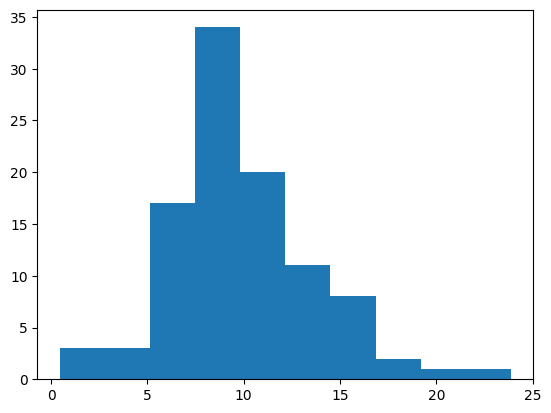

In [8]:
plt.hist(bg_trials["ts"])